<a href="https://colab.research.google.com/github/monalip13/lenet/blob/main/neuralnetworkmachine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

loss: 2.0811937
Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3012 - accuracy: 0.9109
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1462 - accuracy: 0.9573
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1070 - accuracy: 0.9677
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0870 - accuracy: 0.9728
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0756 - accuracy: 0.9762
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0652 - accuracy: 0.9790
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0583 - accuracy: 0.9813
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0536 - accuracy: 0.9822
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0476 - accuracy: 0.9847
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/

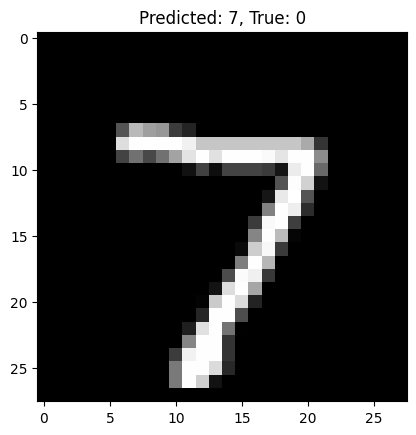

This is the image 1 from x_test
1/1 [==============================] - 0s 23ms/step


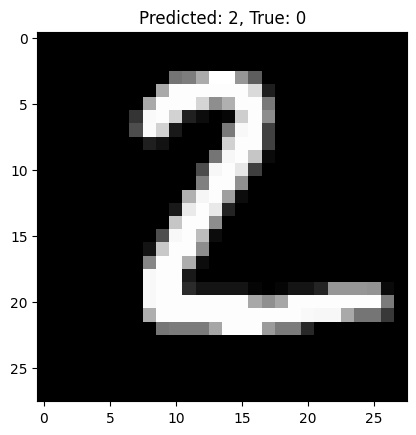

This is the image 2 from x_test
1/1 [==============================] - 0s 23ms/step


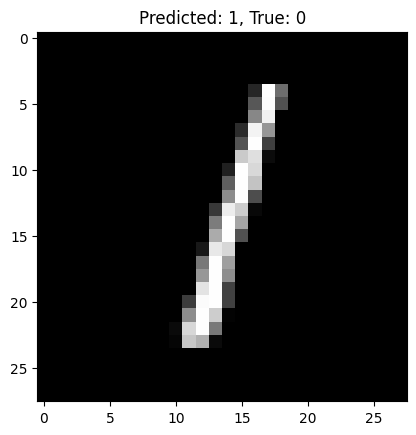

This is the image 3 from x_test
1/1 [==============================] - 0s 23ms/step


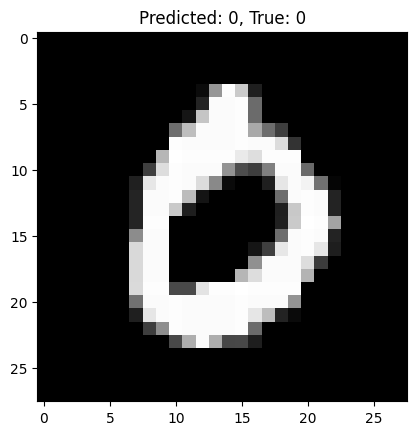

This is the image 4 from x_test
1/1 [==============================] - 0s 22ms/step


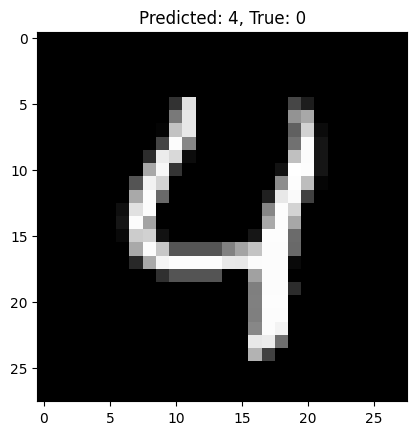

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
VERBOSE=2
mnist = tf.keras.datasets.mnist
# load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
# Build a machine learning model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])
predictions = model(x_train[:1]).numpy()
predictions
tf.nn.softmax(predictions).numpy()
# Define a loss function for training
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# Calculate the initial loss
y= loss_fn(y_train[:1], predictions).numpy()
print("loss:", y)
# Configure and Compile the model using optimizer before training, set the metrics to accuracy to evaluate the model.
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
# Traim and Evaluate the Model
model.fit(x_train, y_train, epochs=10)
model.evaluate(x_test,  y_test, verbose=2)
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])
t = probability_model(x_test[:5])
print("Probability_Model:", t)
score = model.evaluate(x_test, y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])
import matplotlib.pyplot as plt
import numpy as np
# Visualize some MNIST images along with predictions
num_images_to_display = 5
# Display the images
for i in range(5):
    print(f"This is the image {i} from x_test")
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {np.argmax(model.predict(x_test[i:i+1]))}, True: {np.argmax(y_test[i])}')
    plt.show()